In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score,mean_absolute_error
from data_preprocess import *

In [2]:
def plot_score(s,y1=-50,y2=400):
    y_pred=model.predict(X_test)
    plt.figure(figsize=(16,8),dpi=300)
    plt.plot(Y_test.values,'b-',label='Actual Value')
    plt.plot(y_pred,'r-',label='Predicted Value')
    plt.ylim(y1,y2)
    plt.ylabel('Concentration')
    plt.xlabel('Test Sample')
    plt.text(0,y2-10,"R$^2$= {}".format(r2_score(Y_test.values,y_pred)))
    plt.text(0,y2-20,"Mean absolute error= {}".format(mean_absolute_error(Y_test.values,y_pred)))
    plt.title(s)
    _=plt.legend()

In [3]:
df=load_roundhill_data()
test_set=[14,26,32,15,33]
X_train=df.drop(test_set)
X_test=df.loc[test_set]
Y_train=X_train.pop('C(mg/m3)')
Y_test=X_test.pop('C(mg/m3)')

In [4]:
normalizer=Normalization()
normalizer.adapt(np.array(X_train))
model=Sequential([
    normalizer,
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1),
])
model.compile(optimizer='adam',loss='mean_absolute_error')
history=model.fit(X_train,Y_train,epochs=100,verbose=1,batch_size=500)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 14.6280
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 14.3852
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 14.1953
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 14.0008
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 13.7883
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 13.5634
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 13.3177
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 13.0454
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 12.7541
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 12.4492
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 12.1229
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 11.7943
Epoch 13/100
4/4 [==============================]

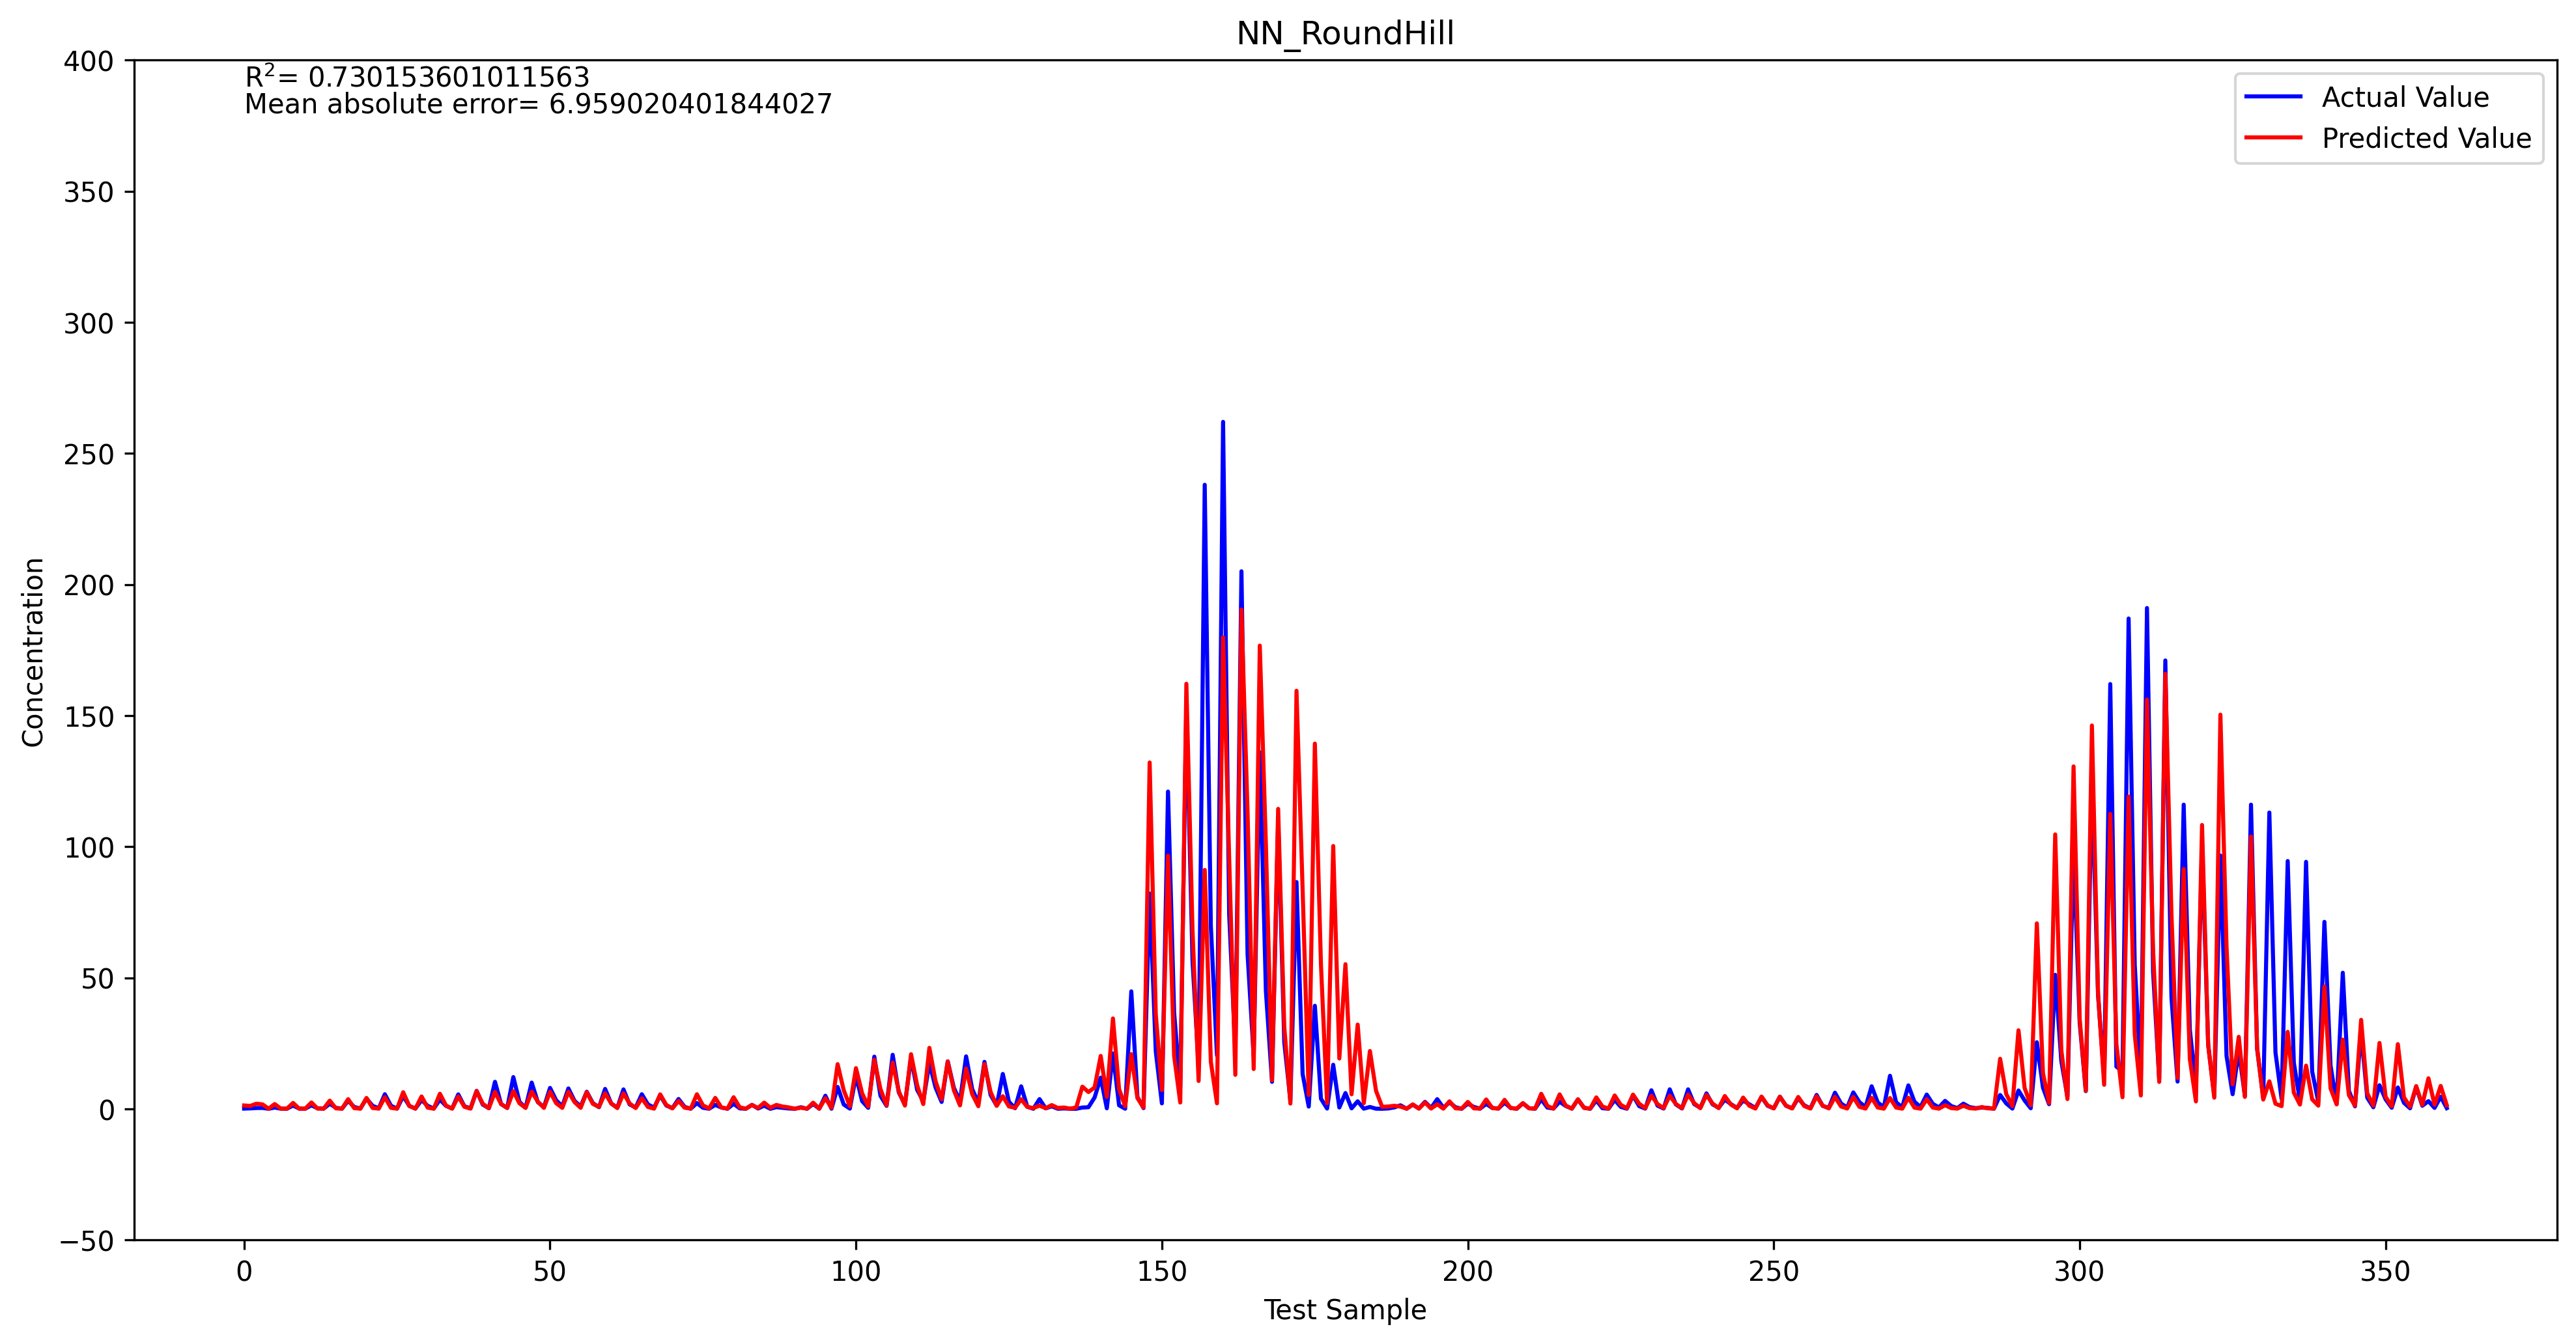

In [5]:
plot_score('NN_RoundHill')

In [6]:
df=load_prairie_data()
test_set=[19,27,37,57,67]
X_train=df.drop(test_set)
X_test=df.loc[test_set]
Y_train=X_train.pop('C(g/m3)')
Y_test=X_test.pop('C(g/m3)')

In [7]:
normalizer=Normalization()
normalizer.adapt(np.array(X_train))
model=Sequential([
    normalizer,
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1),
])
model.compile(optimizer='adam',loss='mean_absolute_error')
history=model.fit(X_train,Y_train,epochs=100,verbose=1,batch_size=500)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 34.1198
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 33.4977
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 32.8908
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 32.4140
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 32.0317
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 31.6982
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 31.4555
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 31.2411
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 31.0488
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 30.8786
Epoch 11/100
15/15 [==============================] - 0s 1ms/step - loss: 30.7272
Epoch 12/100
15/15 [==============================] - 0s 1ms/step - loss: 30.5335
Epoch 13/100
15/15 [=====

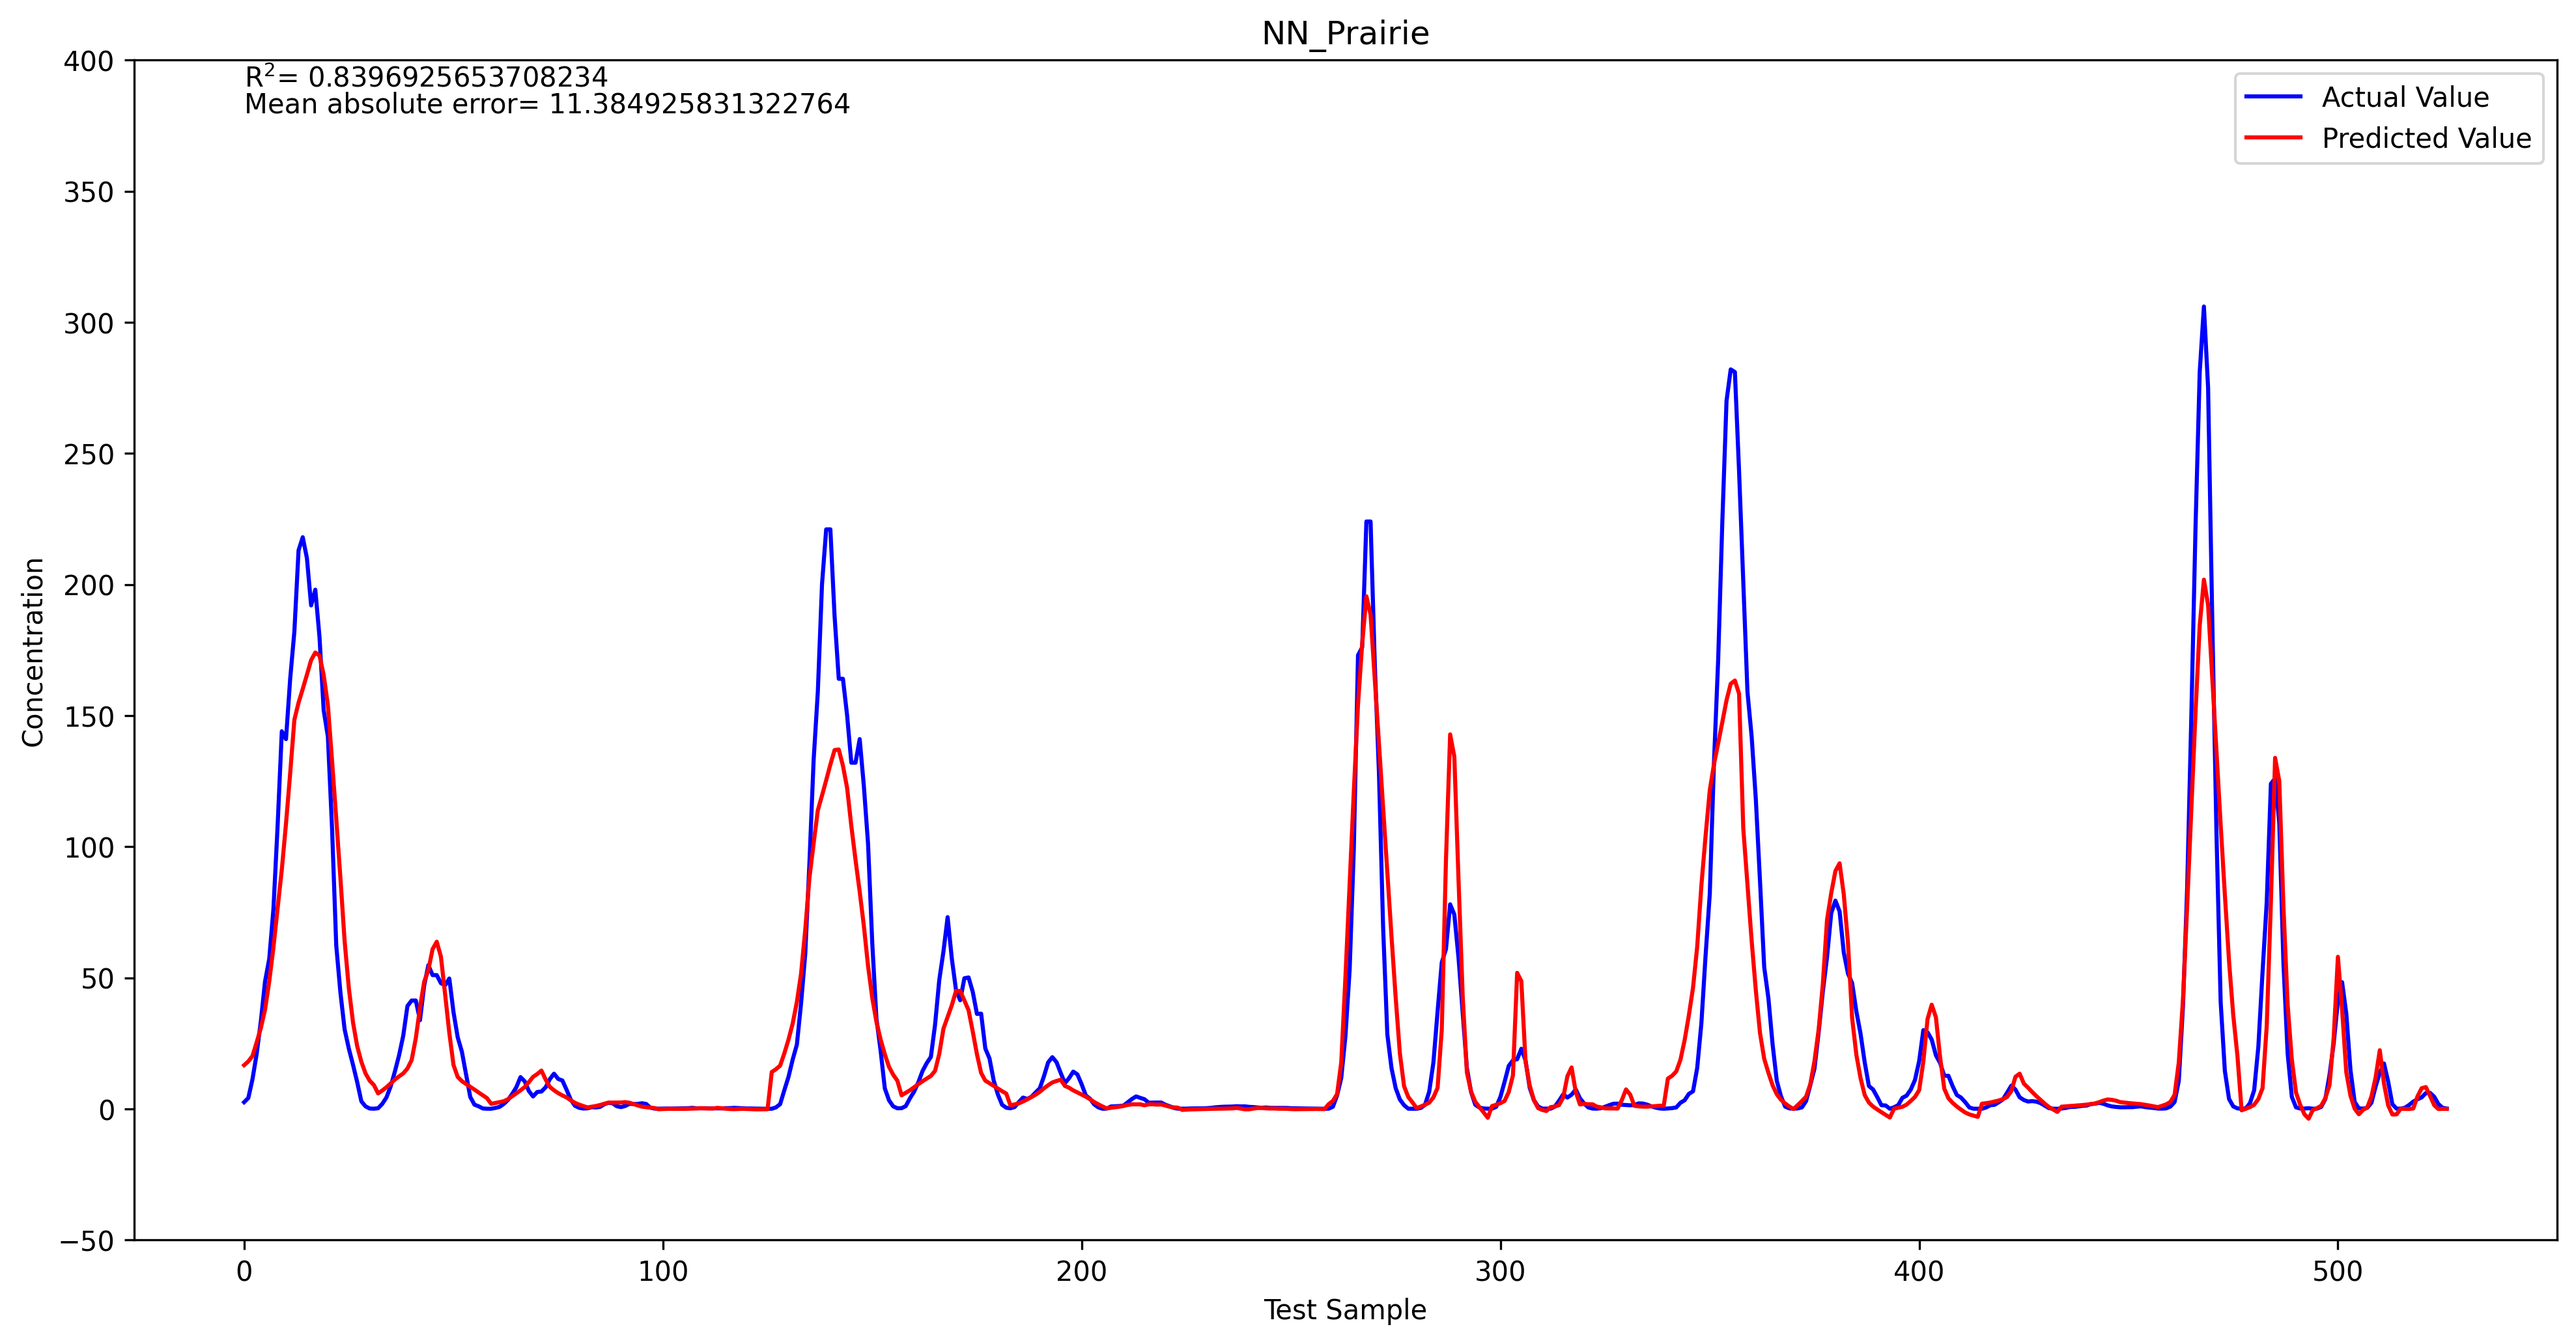

In [8]:
plot_score('NN_Prairie')